# Segmentación de Clientes en ecommerce

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler;
from sklearn.cluster import KMeans;

In [187]:
#Importamos los datos
df = pd.read_csv('/content/ventas-por-factura.csv')

In [188]:
#Revisamos las primeras filas
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [189]:
#vemos si existen nulos
df.isnull().sum()

,0
N° de factura,0
Fecha de factura,0
ID Cliente,3724
País,0
Cantidad,0
Monto,0


In [190]:
#Revisamos la forma de la tabla cuantas filas y columnas
df.shape

(25953, 6)

In [191]:
#Revisamos los tipos de datos
df.dtypes

,0
N° de factura,object
Fecha de factura,object
ID Cliente,float64
País,object
Cantidad,int64
Monto,object


In [192]:
#Revisar el Dataset detectar ID Cliente posee el caracter C
num_unique_clients = df['ID Cliente'].nunique()
print(num_unique_clients)

4372


In [193]:
#Dejamos la columna ID Cliente sin el caracter "C" y dejar como entero
# Asegurarse de que los valores sean de tipo string
df['N° de factura'] = df['N° de factura'].astype(str)


# Eliminar el carácter 'C' y manejar los valores que no se pueden convertir a enteros en la columna 'n° de factura'
df['ID Cliente'] = df['ID Cliente'].astype(str)
df['ID Cliente'] = df['ID Cliente'].str.replace('^C', '', regex = True)


#Reemplazamos la coma por punto en la columna Monto
df['Monto'] = df['Monto'].str.replace(',', '.')

# Convertir las columnas a valores numéricos, reemplazando los valores no numéricos con NaN
df['Cantidad'] = pd.to_numeric(df['Cantidad'], errors='coerce')
df['Monto'] = pd.to_numeric(df['Monto'], errors='coerce')

# Eliminar las filas con cantidades negativas y montos menores o iguales a cero
df = df.drop(df[(df['Cantidad'] < 0) & (df['Monto'] <= 0 )].index)

print(df)

      N° de factura     Fecha de factura ID Cliente            País  Cantidad  \
0            548370   3/30/2021 16:14:00    15528.0  United Kingdom       123   
1            575767  11/11/2021 11:11:00    17348.0  United Kingdom       163   
3            549106    4/6/2021 12:08:00    17045.0  United Kingdom         1   
4            573112  10/27/2021 15:33:00    16416.0  United Kingdom       357   
5            576630   11/16/2021 8:38:00    13816.0         Germany        91   
...             ...                  ...        ...             ...       ...   
25945        579252  11/28/2021 16:47:00    17450.0  United Kingdom       432   
25946        574908   11/7/2021 15:37:00    16009.0  United Kingdom        28   
25949        553060   5/13/2021 10:44:00    15826.0  United Kingdom       488   
25950        577049  11/17/2021 13:58:00    17397.0  United Kingdom       104   
25951        550122   4/14/2021 12:39:00    12931.0  United Kingdom      1176   

         Monto  
0       22

In [194]:
#Eliminamos las filas duplicadas
df = df.drop_duplicates()

In [195]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,209.73
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,344.83
5,576630,11/16/2021 8:38:00,13816.0,Germany,91,199.98


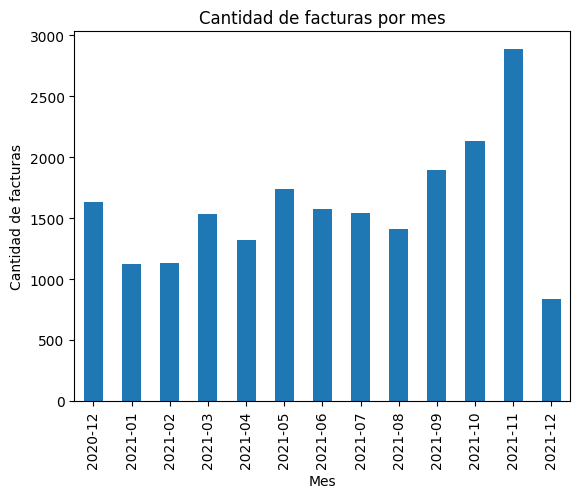

In [196]:
# Convertir la columna 'Fecha de factura' a tipo datetime
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'])

# Extraer el mes y el año de la columna 'Fecha de factura'
df['Mes'] = df['Fecha de factura'].dt.to_period('M')

# Contar la cantidad de facturas por mes
facturas_por_mes = df['Mes'].value_counts().sort_index()

# Generar el gráfico
facturas_por_mes.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Cantidad de facturas')
plt.title('Cantidad de facturas por mes')
plt.show()

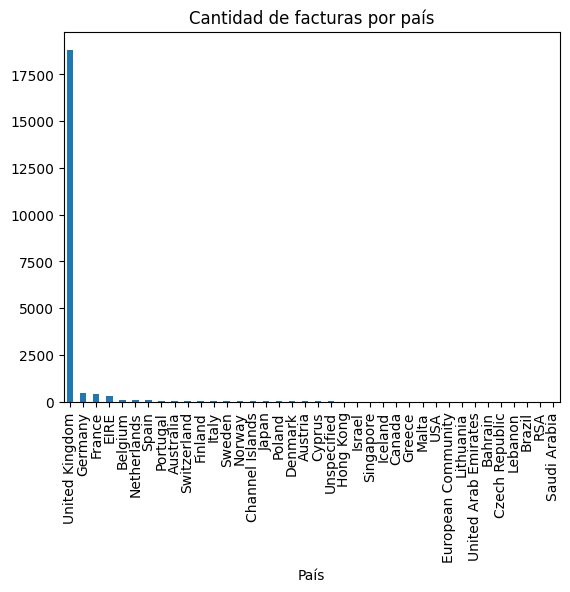

In [197]:
# Contar la cantidad de facturas por país
facturas_por_pais = df['País'].value_counts()

# Generar el gráfico de torta
facturas_por_pais.plot(kind='bar')
plt.ylabel('')
plt.title('Cantidad de facturas por país')
plt.show()

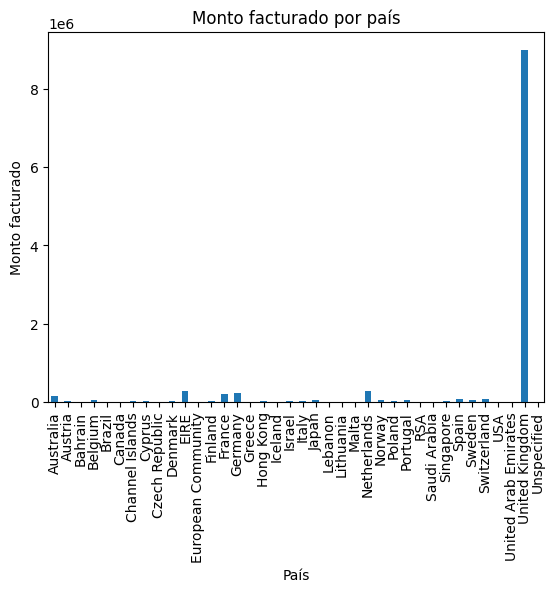

In [198]:
# Calcular el monto facturado por país
monto_por_pais = df.groupby('País')['Monto'].sum()

# Generar el gráfico de barras
monto_por_pais.plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Monto facturado')
plt.title('Monto facturado por país')
plt.show()

In [199]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto,Mes
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33,2021-03
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73,2021-11
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95,2021-04
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83,2021-10
5,576630,2021-11-16 08:38:00,13816.0,Germany,91,199.98,2021-11


In [200]:
#Identificamos Recencia la cual mide el tiempo transcurrido desde la última compra, Frecuencia número de visitas del cliente, Monto suma de los montos
ultima_fecha = df['Fecha de factura'].max() + dt.timedelta(days=1)



#Creamos un nuevo dataframe con la data para RFM
df_ventasRFM = df.groupby('ID Cliente').agg(
    recency=('Fecha de factura', lambda x: (ultima_fecha - x.max()).days),
    frequency=('ID Cliente', 'count'),
    monevalue=('Monto', 'sum')
)

print(df_ventasRFM.head())


            recency  frequency  monevalue
ID Cliente                               
12346.0         326          1   77183.60
12347.0           2          7    4310.00
12348.0          75          4    1797.24
12349.0          19          1    1757.55
12350.0         310          1     334.40


In [201]:
df_ventasRFM.shape

(4340, 3)

In [202]:
#Creamos un nuevo dataframe con la data  RFM por país
df_ventasRFMPais = df.groupby('País').agg(
    nCustomers = ('ID Cliente', 'count'),
    recency = ('Fecha de factura', lambda x: (ultima_fecha - x.max()).days),
    frequency = ('País', 'count'),
    monevalue = ('Monto', 'sum')
)

df_ventasRFMPais.head()
df_ventasRFMPais

,nCustomers,recency,frequency,monevalue
País,,,,
Australia,57,16,57,138521.31
Austria,17,2,17,10198.68
Bahrain,3,204,3,754.14
Belgium,98,1,98,41196.34
Brazil,1,239,1,1143.60
Canada,6,107,6,3666.38
Channel Islands,26,5,26,20450.44
Cyprus,16,22,16,13590.38
Czech Republic,2,64,2,826.74


In [203]:
df_ventasRFMPais[(df_ventasRFMPais.frequency>50) & (df_ventasRFMPais.monevalue>5000)]

,nCustomers,recency,frequency,monevalue
País,,,,
Australia,57,16,57,138521.31
Belgium,98,1,98,41196.34
EIRE,289,1,289,283453.96
France,393,1,393,209715.11
Germany,457,1,457,228867.14
Netherlands,95,2,95,285446.34
Portugal,58,2,58,33747.10
Spain,90,2,90,61577.11
Switzerland,54,11,54,57089.90


recency: 


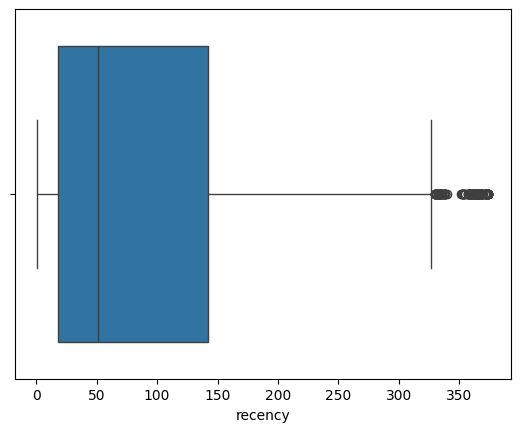

frequency: 


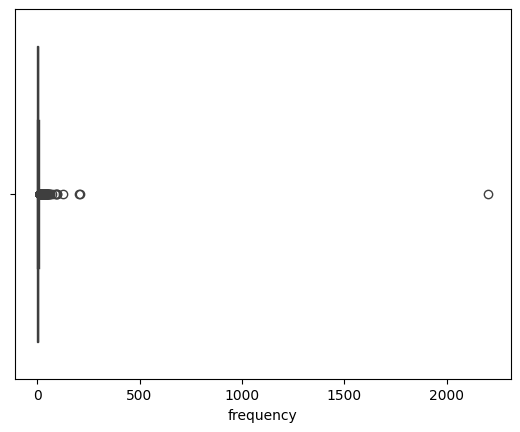

monevalue: 


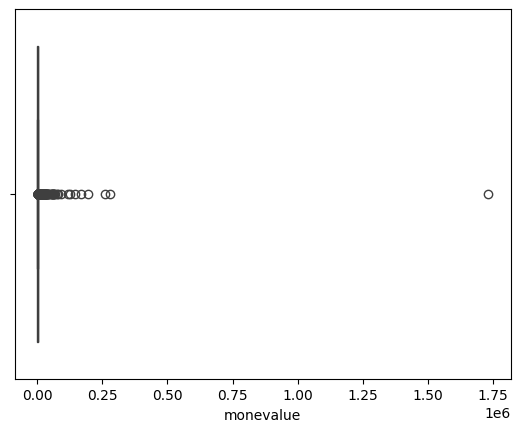

In [204]:
for i in df_ventasRFM.columns:
    print(str(i) + ': ')
    ax = sns.boxplot(x = df_ventasRFM[str(i)])
    plt.show()

In [205]:
#Estandarizamos
df_ventas_log = np.log1p(df_ventasRFM);


scaler = StandardScaler()
scaler.fit(df_ventas_log)
df_ventas_norm = scaler.transform(df_ventas_log)

df_ventas_norm = pd.DataFrame(df_ventas_norm, columns=["recency","frequency", "monevalue"], index = df_ventasRFM.index)
df_ventas_norm.head()

,recency,frequency,monevalue
ID Cliente,,,
12346.0,1.462021,-0.948468,3.679108
12347.0,-2.037021,1.059935,1.401381
12348.0,0.373657,0.379014,0.711074
12349.0,-0.622054,-0.948468,0.693453
12350.0,1.424604,-0.948468,-0.614684


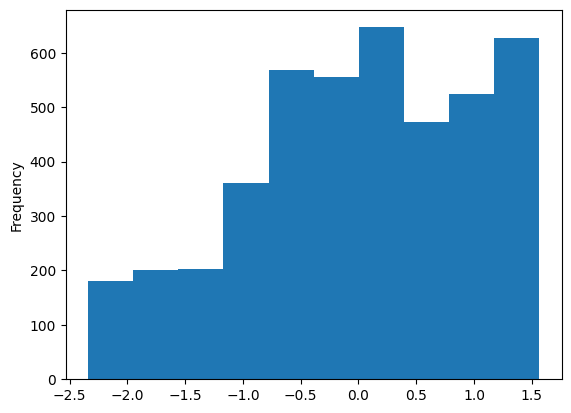

In [206]:
df_ventas_norm.recency.plot(kind="hist")
plt.show()

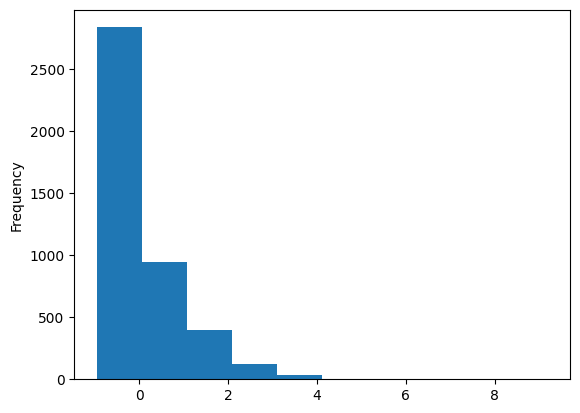

In [207]:
df_ventas_norm.frequency.plot(kind="hist")
plt.show()

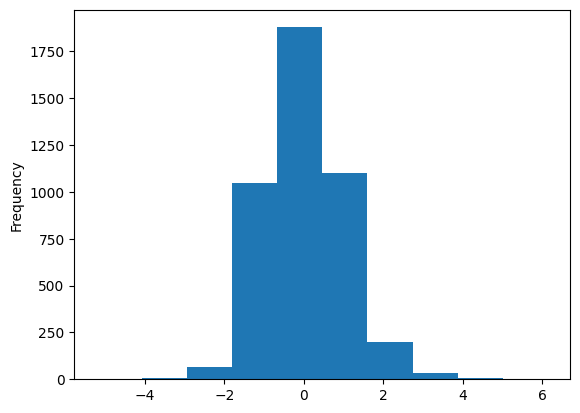

In [208]:
df_ventas_norm.monevalue.plot(kind="hist")
plt.show()

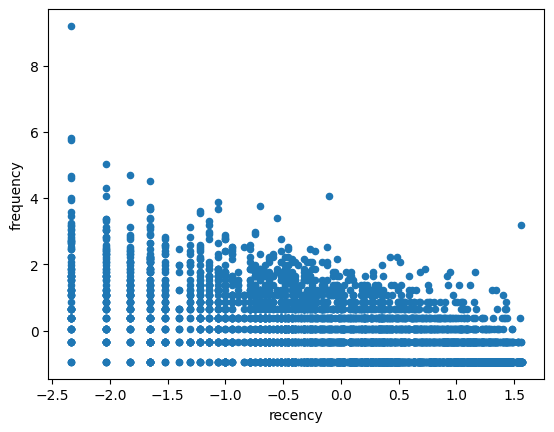

In [209]:
df_ventas_norm.plot("recency", "frequency", kind="scatter")
plt.show()

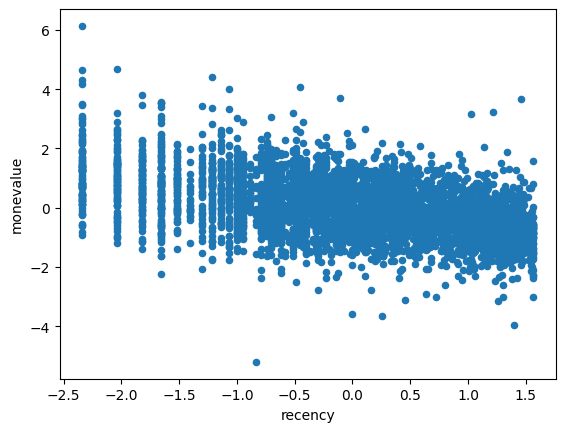

In [210]:
df_ventas_norm.plot("recency", "monevalue", kind="scatter")
plt.show()

In [211]:
#Clustering

kmeans = KMeans(n_clusters= 4, random_state= 1, n_init= "auto")

kmeans.fit(df_ventas_norm)

np.unique(kmeans.labels_, return_counts = True)


(array([0, 1, 2, 3], dtype=int32), array([1573,  694, 1183,  890]))

In [212]:
#Segmentacion
df_ventasRFM["group"] = kmeans.labels_;
df_ventasRFM["group"] = df_ventasRFM["group"].astype("category");

In [213]:
df_ventasRFM.groupby('group').agg(
    recency = ('recency', 'mean'),
    frequency = ('frequency', 'mean'),
    monevalue = ('monevalue', 'mean'),
    group_size = ('monevalue', 'count')
).round(1).sort_values(by='recency')

<ipython-input-213-40ded2de1b69>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ventasRFM.groupby('group').agg(


,recency,frequency,monevalue,group_size
group,,,,
1,11.1,17.0,10699.8,694
3,22.1,1.9,486.6,890
2,63.1,4.3,1865.7,1183
0,190.3,1.4,367.9,1573



Grupo 1:
Recency (11.1): Los clientes de este grupo han realizado compras recientemente, en promedio hace 11.1 días.
Frequency (17.0): Estos clientes compran con bastante frecuencia, con un promedio de 17 compras.
Monetary Value (10699.8): El valor monetario total de las compras es alto, con un promedio de 10699.8 unidades monetarias.
Group Size (694): Este grupo tiene 694 clientes.
Interpretación: Este grupo representa a los mejores clientes, que compran frecuentemente y han realizado compras recientes con un alto valor monetario.

Grupo 3:
Recency (22.1): Los clientes de este grupo han realizado compras hace un poco más de tiempo, en promedio hace 22.1 días.
Frequency (1.9): La frecuencia de compra es baja, con un promedio de 1.9 compras.
Monetary Value (486.6): El valor monetario total de las compras es bajo, con un promedio de 486.6 unidades monetarias.
Group Size (890): Este grupo tiene 890 clientes.
Interpretación: Este grupo podría representar a clientes nuevos o esporádicos que no compran con mucha frecuencia y cuyo valor de compra es bajo.

Grupo 2:
Recency (63.1): Los clientes de este grupo han realizado compras hace bastante tiempo, en promedio hace 63.1 días.
Frequency (4.3): La frecuencia de compra es moderada, con un promedio de 4.3 compras.
Monetary Value (1865.7): El valor monetario total de las compras es moderado, con un promedio de 1865.7 unidades monetarias.
Group Size (1183): Este grupo tiene 1183 clientes.
Interpretación: Este grupo podría representar a clientes que compran ocasionalmente y que no han realizado compras recientes.

Grupo 0:
Recency (190.3): Los clientes de este grupo han realizado compras hace mucho tiempo, en promedio hace 190.3 días.
Frequency (1.4): La frecuencia de compra es muy baja, con un promedio de 1.4 compras.
Monetary Value (367.9): El valor monetario total de las compras es muy bajo, con un promedio de 367.9 unidades monetarias.
Group Size: No se proporciona el tamaño del grupo.
Interpretación: Este grupo podría representar a clientes inactivos o que han dejado de comprar.

<Axes: xlabel='group', ylabel='monevalue'>

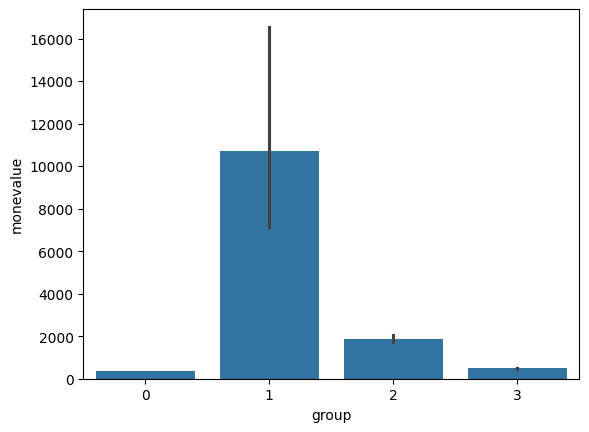

In [214]:
sns.barplot(data=df_ventasRFM,x="group", y="monevalue")

<Axes: xlabel='group', ylabel='frequency'>

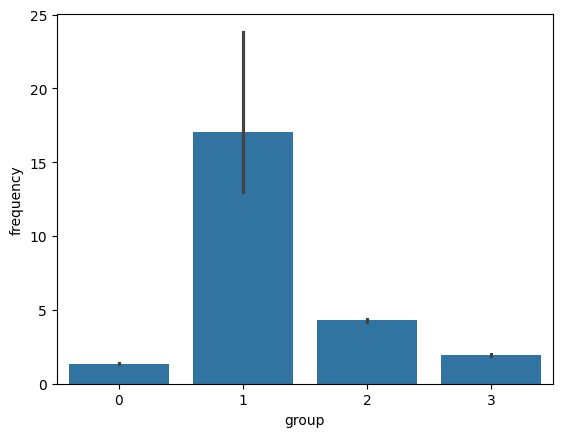

In [215]:
sns.barplot(data=df_ventasRFM,x="group", y="frequency")

<Axes: xlabel='group', ylabel='recency'>

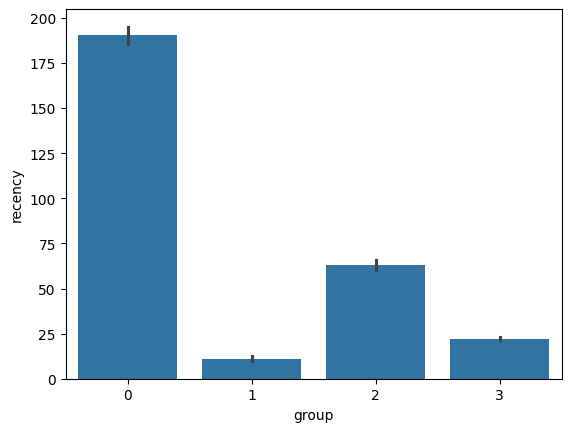

In [216]:
sns.barplot(data=df_ventasRFM,x="group", y="recency")